# Use Case 4: Comparing Mutation Protein Abundance

<b>Standard imports for playing with and plotting data frames.</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<b>Import CPTAC data</b>

In [2]:
import CPTAC

Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Data...

 ******PLEASE READ******


<b>To begin, retrieve protein abudance and somatic gene mutations. The somatic data is represented in binary format: 0 if no mutation is present in the gene, 1 if the mutation is present.</b>

In [3]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()

<b>Next, pick a gene of interest. Our first gene will be a gene with high frequency of mutation. For this example, we will be using the gene with the highest number of mutations across the samples. If you already know the name of the gene you can skip this step.</b>

In [4]:
high = somatic_mutations.sum() == max(somatic_mutations.sum())
gene = somatic_mutations[somatic_mutations.columns[high]].columns[0]
print(gene)

PTEN


<b>Once you have found your gene of interest, use the gene to compare somatic and protein abundance utilizing the <code>CPTAC.compare_gene()</code> function. (An array of genes can also be passed to this function). If you want to be reminded of what gene you are comparing, enter <code>cross.name</code> (Also, note the binary nature of the somatic data, 0 if no mutation is present for that sample in that gene, 1 if the mutation is present).</b> 

In [10]:
cross = CPTAC.compare_gene(somatic_mutations, proteomics, gene)

<b>Finally, compare the mutated genes with the non-mutated genes. Plot a boxplot of  protein abundance in mutated against non-mutated.</b>

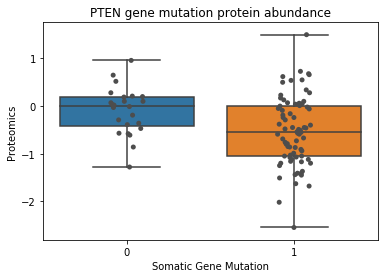

In [11]:
somatic_boxplot = sns.boxplot(data=cross, x="somatic",y="proteomics")
somatic_boxplot.set_title("PTEN gene mutation protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x="somatic", y="proteomics",jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.savefig("uc4PTEN.pdf",dpi = 300)

<b>We can now compare this plot to the plot of another gene (in this case, CTNNB1)</b>

In [7]:
cross2 = CPTAC.compare_gene(somatic_mutations, proteomics, 'CTNNB1')

<b>And plot it the same way</b>

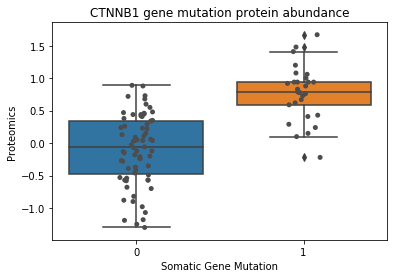

In [8]:
boxplot2 = sns.boxplot(data=cross2, x="somatic",y="proteomics")
boxplot2.set_title("CTNNB1 gene mutation protein abundance")
boxplot2 = sns.stripplot(data=cross2, x="somatic",y="proteomics",jitter=True, color=".3")
boxplot2.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()

In [9]:
"""fig, axs = plt.subplots(ncols = 2)
somatic_boxplot = sns.boxplot(data=cross, x="somatic",y="proteomics", ax=axs[0])
somatic_boxplot.set_title("PTEN gene mutation protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x="somatic", y="proteomics",jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics(unit)")
boxplot2 = sns.boxplot(data=cross, x="somatic",y="proteomics", ax = axs[1])
boxplot2.set_title("CTNNB1 gene mutation protein abundance")
boxplot2 = sns.stripplot(data=cross, x="somatic",y="proteomics",jitter=True, color=".3")
boxplot2.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics(unit)")
plt.show()"""

'fig, axs = plt.subplots(ncols = 2)\nsomatic_boxplot = sns.boxplot(data=cross, x="somatic",y="proteomics", ax=axs[0])\nsomatic_boxplot.set_title("PTEN gene mutation protein abundance")\nsomatic_boxplot = sns.stripplot(data=cross, x="somatic", y="proteomics",jitter=True, color=".3")\nsomatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics(unit)")\nboxplot2 = sns.boxplot(data=cross, x="somatic",y="proteomics", ax = axs[1])\nboxplot2.set_title("CTNNB1 gene mutation protein abundance")\nboxplot2 = sns.stripplot(data=cross, x="somatic",y="proteomics",jitter=True, color=".3")\nboxplot2.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics(unit)")\nplt.show()'